In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
## 自行选择2个数据集进行探索性分析与预处理
# 加载数据集
data = pd.read_csv(r"D:\数据挖掘\GitHub Dataset\repository_data.csv") # 第一个数据集选择GitHub Dataset

# 查看数据的总体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917951 entries, 0 to 2917950
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   stars_count       int64  
 2   forks_count       int64  
 3   watchers          int64  
 4   pull_requests     int64  
 5   primary_language  object 
 6   languages_used    object 
 7   commit_count      float64
 8   created_at        object 
 9   licence           object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.6+ MB


In [3]:
# 共有2917951条数据，每个数据有5个标称属性和5个数值属性

In [4]:
## 数据摘要
# 给出标称属性每个可能取值的频数
for i in data.columns:
    if data[i].dtype == object:
        print(data[i].value_counts())

name
dotfiles                                 5590
blog                                     2038
docs                                     1350
website                                  1163
scripts                                   649
                                         ... 
markdown-to-presentation                    1
moodle-client                               1
event-sourcing-graph                        1
react-native-100-Demos                      1
MSI-Z690-Carbon-i7-12700KF-Hackintosh       1
Name: count, Length: 2410862, dtype: int64
primary_language
JavaScript              451954
Python                  451473
Java                    202394
C++                     150066
PHP                     116058
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: count, Length: 497, dtype: int64
languages_used
['Python']                        

In [5]:
# 给出数值属性的5数概括及缺失值的个数
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ]:
        print(data[i].name)
        print("null count:{}".format(data[i].isnull().sum()))
        maximum=max(data[i])
        q3=data[i].quantile(.75)
        median=data[i].median()
        q1=data[i].quantile(.25)
        minimum=min(data[i])
        print("max:{} q3:{} median:{} q1:{} min:{}".format(maximum, q3, median, q1, minimum))

stars_count
null count:0
max:359805 q3:30.0 median:12.0 q1:7.0 min:2
forks_count
null count:0
max:242208 q3:11.0 median:4.0 q1:1.0 min:0
watchers
null count:0
max:9544 q3:6.0 median:3.0 q1:2.0 min:0
pull_requests
null count:0
max:301585 q3:6.0 median:1.0 q1:0.0 min:0
commit_count
null count:1921
max:4314502.0 q3:89.0 median:27.0 q1:9.0 min:1.0


In [6]:
# 有缺失值的数值属性仅有commit_count，共有1921条数据的commit_count值缺失

<Axes: >

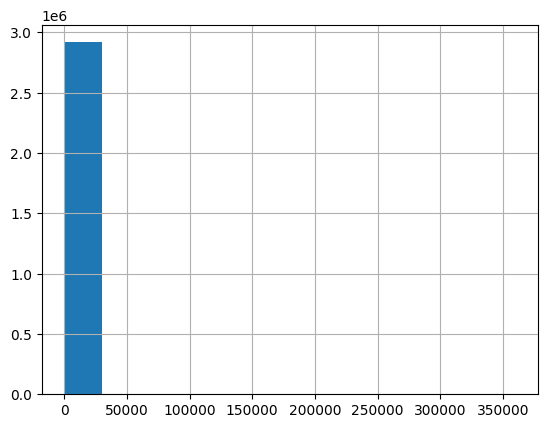

In [7]:
## 数据可视化
# 直方图
data["stars_count"].hist(bins=12)

<Axes: >

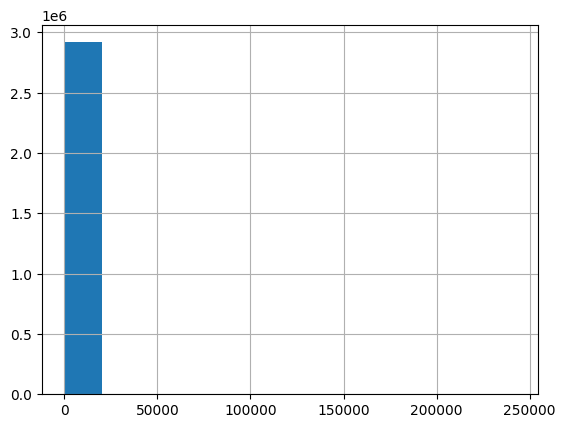

In [8]:
data["forks_count"].hist(bins=12)

<Axes: >

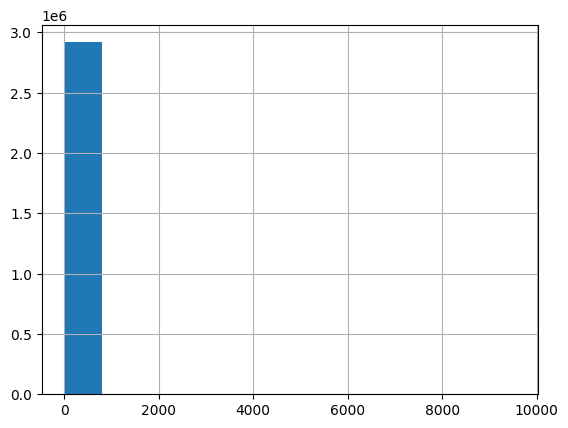

In [9]:
data["watchers"].hist(bins=12)

<Axes: >

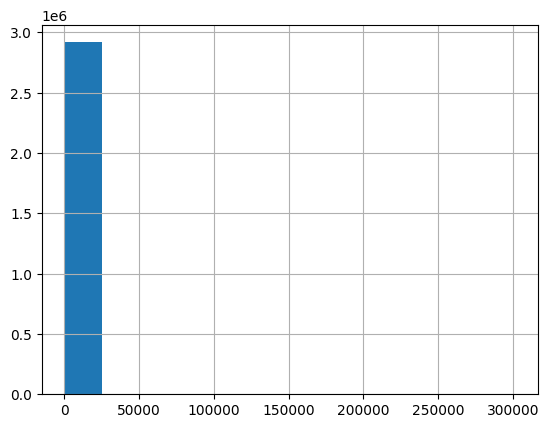

In [10]:
data["pull_requests"].hist(bins=12)

<Axes: >

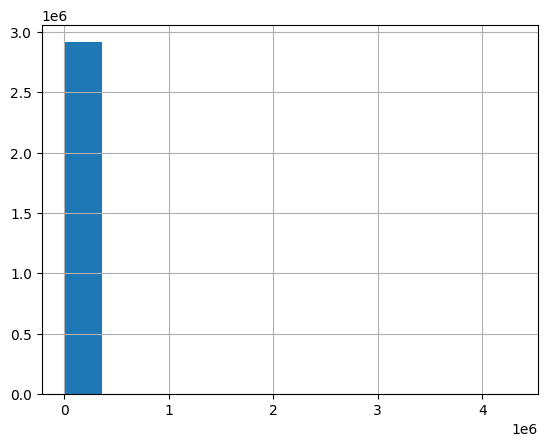

In [11]:
data["commit_count"].hist(bins=12)

<Axes: >

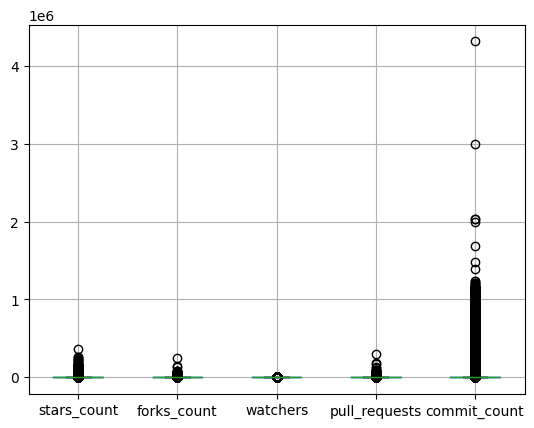

In [12]:
# 盒图
plotlist = []
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ]:
        plotlist.append(i)
data[plotlist].boxplot()

In [13]:
# 离群点
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ]:
        print(data[i].name)
        q1, q3 = data[i].quantile([0.25, 0.75])
        iqr = q3 - q1
        outlier = data[(data[i] > q3 + iqr * 1.5) | (data[i] < q1 + iqr * 1.5)]
        print(outlier)

stars_count
                                          name  stars_count  forks_count  \
0                                 freeCodeCamp       359805        30814   
1                                      996.ICU       264811        21470   
2                       free-programming-books       262380        53302   
3                  coding-interview-university       244927        65038   
4                                      awesome       235223        24791   
...                                        ...          ...          ...   
2917946                          FastledServer            6            1   
2917947                 zero-motorcycle-canbus            6            3   
2917948       common-object-management-service            6            7   
2917949  MSI-Z690-Carbon-i7-12700KF-Hackintosh            6            5   
2917950                                 bottle            6            0   

         watchers  pull_requests primary_language  \
0            8448     

                                          name  stars_count  forks_count  \
0                                 freeCodeCamp       359805        30814   
1                                      996.ICU       264811        21470   
2                       free-programming-books       262380        53302   
3                  coding-interview-university       244927        65038   
4                                      awesome       235223        24791   
...                                        ...          ...          ...   
2917946                          FastledServer            6            1   
2917947                 zero-motorcycle-canbus            6            3   
2917948       common-object-management-service            6            7   
2917949  MSI-Z690-Carbon-i7-12700KF-Hackintosh            6            5   
2917950                                 bottle            6            0   

         watchers  pull_requests primary_language  \
0            8448          31867  

In [14]:
## 数据缺失的处理
for i in data.columns:
    print(data[i].name)
    print("null count:{}".format(data[i].isnull().sum()))

name
null count:13
stars_count
null count:0
forks_count
null count:0
watchers
null count:0
pull_requests
null count:0
primary_language
null count:218573
languages_used
null count:221984
commit_count
null count:1921
created_at
null count:0
licence
null count:1378200


In [15]:
# 有缺失值的属性为name，primary_language，languages_used，commit_count和licence，缺失原因分析：
# 记录数据时缺失
# 有些对象的某些属性无法获取
# 某些对象的属性本身就是None
# 某些对象的属性在数据分析中不重要，所以没有获取

<Axes: >

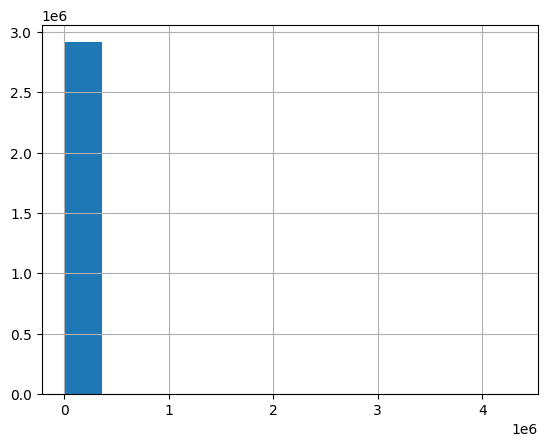

In [16]:
# 以数值属性commit_count为例，分别使用四种策略对缺失值进行处理，并在处理完成后对比新旧数据集的差异
# 将缺失部分剔除
data_copy = data
data.dropna()
data["commit_count"].hist(bins=12)

<Axes: >

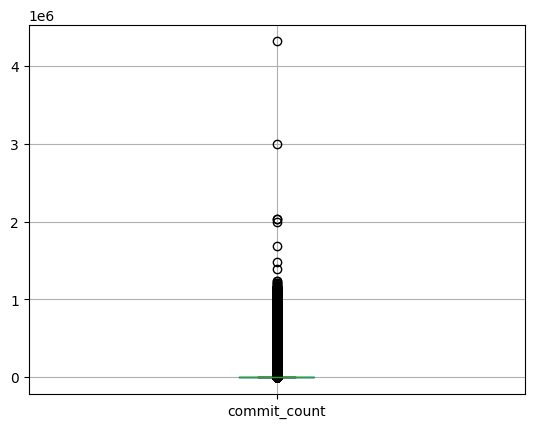

In [17]:
data[["commit_count"]].boxplot()

<Axes: >

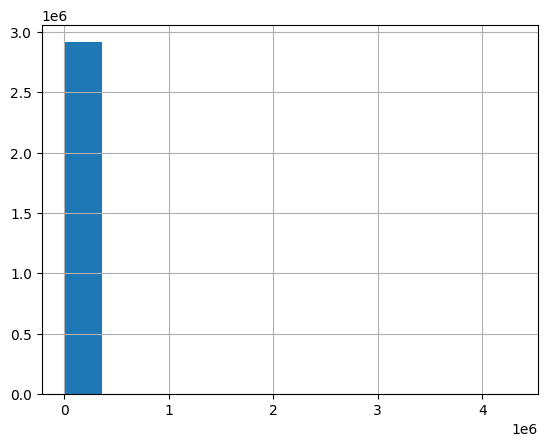

In [18]:
# 用最高频率值来填补缺失值
data = data_copy
for i in data.columns:
    data[i].fillna(data[i].mode())
data["commit_count"].hist(bins=12)

<Axes: >

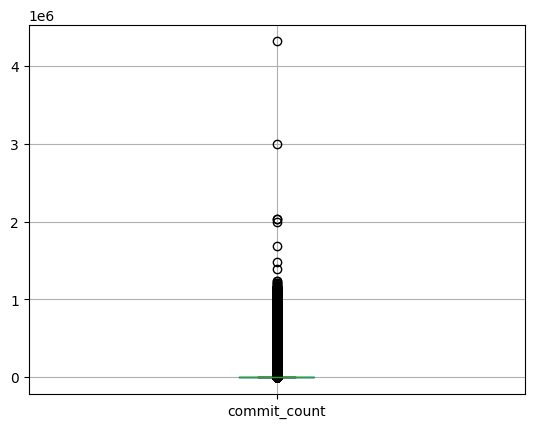

In [19]:
data[["commit_count"]].boxplot()

C:\Users\WhiteLoli\AppData\Local\Temp\ipykernel_6640\3201342750.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate("nearest")


<Axes: >

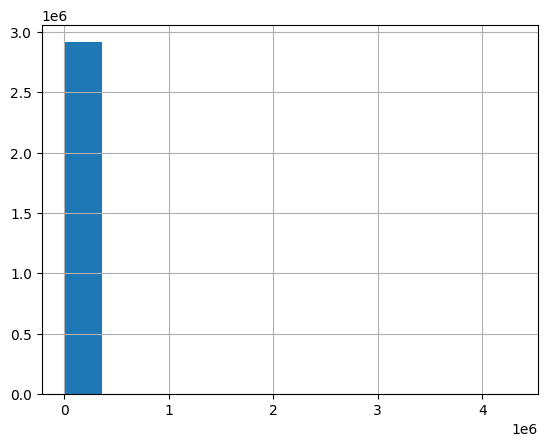

In [20]:
# 通过属性的相关关系来填补缺失值
data = data_copy
data.interpolate("nearest")
data["commit_count"].hist(bins=12)

<Axes: >

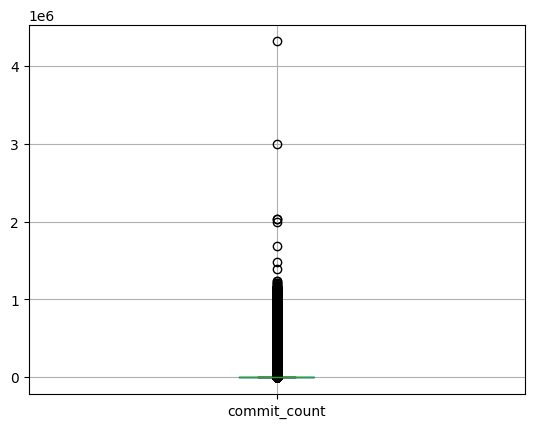

In [21]:
data[["commit_count"]].boxplot()

<Axes: >

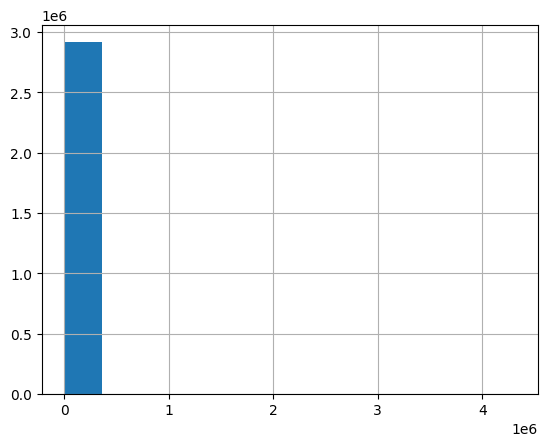

In [22]:
# 通过数据对象之间的相似性来填补缺失值
# 使用KNN算法来对相似数据进行聚类
def knn_filled_func(x_train, y_train, test, k = 3, dispersed = True):
    # x_train为目标列不含缺失值的数据（不包括目标列）
    # y_train为不含缺失值的目标列
    # test为目标列为缺失值的数据（不包括目标列）
    if dispersed:
        knn= KNeighborsClassifier(n_neighbors = k, weights = "distance")
    else:
        knn= KNeighborsRegressor(n_neighbors = k, weights = "distance")
    
    knn.fit(x_train, y_train)
    
    return test.index, knn.predict(test)

data = data_copy
x_train = data[~data["commit_count"].isnull()][["stars_count"]]
y_train = data[~data["commit_count"].isnull()]["commit_count"]
test = data[data["commit_count"].isnull()][["stars_count"]]

index, pred = knn_filled_func(x_train, y_train, test, k = 3, dispersed = True)

data.loc[index, "commit_count"] = pred
data["commit_count"].hist(bins=12)

<Axes: >

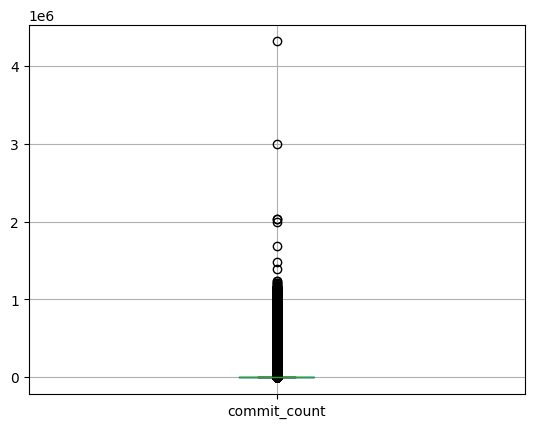

In [23]:
data[["commit_count"]].boxplot()

In [24]:
# 加载数据集
# 第二个数据集选择Alzheimer Disease and Healthy Aging Data in US
data = pd.read_csv(r"D:\数据挖掘\Alzheimer Disease and Healthy Aging Data In US\Alzheimer Disease and Healthy Aging Data In US.csv")

# 查看数据的总体情况
data.info()

C:\Users\WhiteLoli\AppData\Local\Temp\ipykernel_6640\3623659040.py:3: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\数据挖掘\Alzheimer Disease and Healthy Aging Data In US\Alzheimer Disease and Healthy Aging Data In US.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [25]:
# 共有214462条数据，每个数据有24个标称属性和5个数值属性（LocationID为标称属性）

In [26]:
## 数据摘要
# 给出标称属性每个可能取值的频数
for i in data.columns:
    if data[i].dtype == object or i == 'LocationID':
        print(data[i].value_counts())

LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: count, dtype: int64
LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4611
Oregon               

Geolocation
POINT (-120.1550313 44.56744942)    4565
POINT (-75.54397043 42.82700103)    4557
POINT (-111.5871306 39.36070017)    4222
POINT (-82.40426006 40.06021014)    3955
POINT (-83.62758035 32.83968109)    3951
POINT (-76.60926011 39.29058096)    3919
POINT (-157.8577494 21.30485044)    3907
POINT (-85.77449091 35.68094058)    3879
POINT (-84.71439027 44.66131954)    3796
POINT (-78.45789046 37.54268067)    3758
POINT (-81.92896054 28.93204038)    3753
POINT (-68.98503134 45.25422889)    3733
POINT (-99.42677021 31.82724041)    3699
POINT (-117.0718406 39.49324039)    3696
POINT (-77.036871 38.907192)        3684
POINT (-80.71264013 38.6655102)     3682
POINT (-89.53803082 32.7455101)     3677
POINT (-77.86070029 40.79373015)    3648
POINT (-106.240581 34.52088095)     3635
POINT (-86.63186076 32.84057112)    3633
POINT (-84.77497105 37.64597027)    3623
POINT (-147.722059 64.84507996)     3611
POINT (-81.04537121 33.9988213)     3592
POINT (-74.27369129 40.13057005)    3589
POIN

In [27]:
# 给出数值属性的5数概括及缺失值的个数
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ] and i != 'LocationID':
        print(data[i].name)
        print("null count:{}".format(data[i].isnull().sum()))
        maximum=max(data[i])
        q3=data[i].quantile(.75)
        median=data[i].median()
        q1=data[i].quantile(.25)
        minimum=min(data[i])
        print("max:{} q3:{} median:{} q1:{} min:{}".format(maximum, q3, median, q1, minimum))

YearStart
null count:0
max:2020 q3:2019.0 median:2017.0 q1:2016.0 min:2015
YearEnd
null count:0
max:2020 q3:2019.0 median:2018.0 q1:2016.0 min:2015
Data_Value
null count:69833
max:100.0 q3:56.8 median:32.5 q1:15.3 min:0.0
Data_Value_Alt
null count:69833
max:100.0 q3:56.8 median:32.5 q1:15.3 min:0.0
Sample_Size
null count:214462
max:nan q3:nan median:nan q1:nan min:nan


D:\ANACONDA\envs\py39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
# 属性Data_Value和Data_Value_Alt的值缺失69833条
# 属性Sample_Size的值全部缺失，其5数概括没有意义

<Axes: >

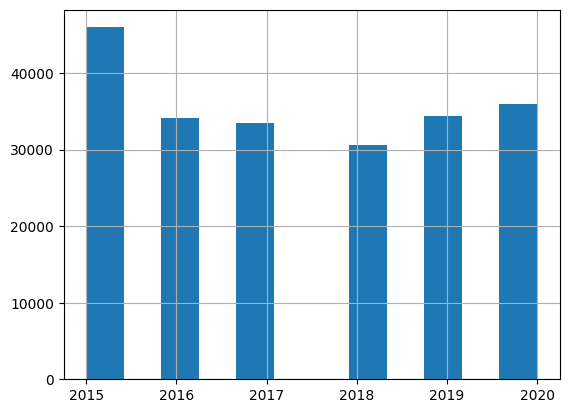

In [29]:
## 数据可视化
# 直方图
data["YearStart"].hist(bins=12)

<Axes: >

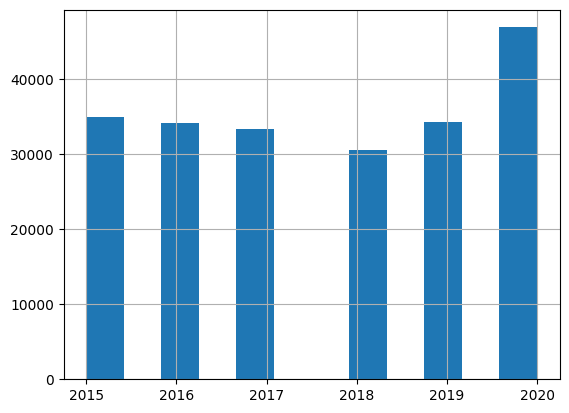

In [30]:
data["YearEnd"].hist(bins=12)

<Axes: >

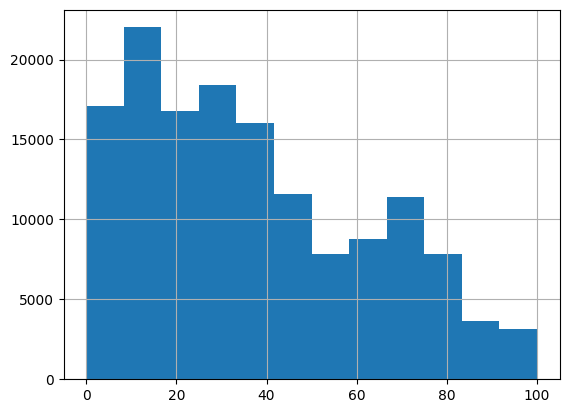

In [31]:
data["Data_Value"].hist(bins=12)

<Axes: >

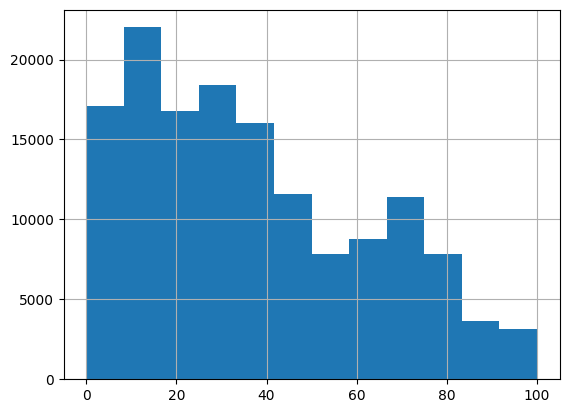

In [32]:
data["Data_Value_Alt"].hist(bins=12)

<Axes: >

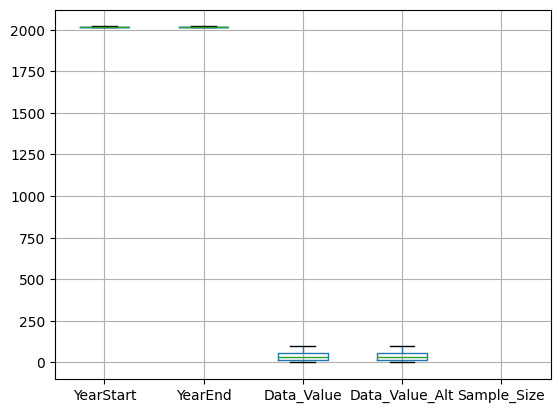

In [33]:
# 盒图
plotlist = []
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ] and i != 'LocationID':
        plotlist.append(i)
data[plotlist].boxplot()

In [34]:
# 离群点
for i in data.columns:
    if data[i].dtype in [ np.int64, np.float64 ] and i != 'LocationID':
        print(data[i].name)
        q1, q3 = data[i].quantile([0.25, 0.75])
        iqr = q3 - q1
        outlier = data[(data[i] > q3 + iqr * 1.5) | (data[i] < q1 + iqr * 1.5)]
        print(outlier)

YearStart
        YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0            2020     2020           HI       Hawaii      BRFSS   
1            2017     2017           ID        Idaho      BRFSS   
2            2017     2017           ID        Idaho      BRFSS   
3            2018     2018           ID        Idaho      BRFSS   
4            2020     2020           IN      Indiana      BRFSS   
...           ...      ...          ...          ...        ...   
214457       2016     2016           WY      Wyoming      BRFSS   
214458       2015     2015           WY      Wyoming      BRFSS   
214459       2017     2017           WY      Wyoming      BRFSS   
214460       2016     2016           WY      Wyoming      BRFSS   
214461       2018     2018           WY      Wyoming      BRFSS   

                          Class  \
0                Overall Health   
1                 Mental Health   
2                Overall Health   
3                Overall Health   
4         

In [35]:
## 数据缺失的处理
for i in data.columns:
    print(data[i].name)
    print("null count:{}".format(data[i].isnull().sum()))

YearStart
null count:0
YearEnd
null count:0
LocationAbbr
null count:0
LocationDesc
null count:0
Datasource
null count:0
Class
null count:0
Topic
null count:0
Question
null count:0
Data_Value_Unit
null count:0
DataValueTypeID
null count:0
Data_Value_Type
null count:0
Data_Value
null count:69833
Data_Value_Alt
null count:69833
Low_Confidence_Limit
null count:69990
High_Confidence_Limit
null count:69990
Sample_Size
null count:214462
StratificationCategory1
null count:0
Stratification1
null count:0
StratificationCategory2
null count:27669
Stratification2
null count:27669
Geolocation
null count:23049
ClassID
null count:0
TopicID
null count:0
QuestionID
null count:0
LocationID
null count:0
StratificationCategoryID1
null count:0
StratificationID1
null count:0
StratificationCategoryID2
null count:0
StratificationID2
null count:0


In [36]:
# 有缺失值的属性为Data_Value，Data_Value_Alt，Low_Confidence_Limit，StratificationCategory2, Stratification2和Geolocation
# 缺失原因分析同上个数据集

<Axes: >

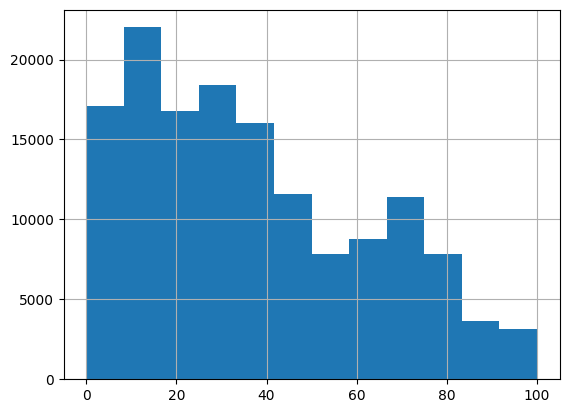

In [37]:
# 以数值属性Data_Value为例，分别使用四种策略对缺失值进行处理，并在处理完成后对比新旧数据集的差异
# 将缺失部分剔除
data_copy = data
data.dropna()
data["Data_Value"].hist(bins=12)

<Axes: >

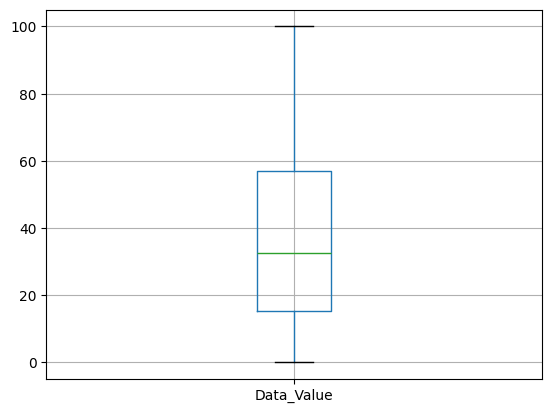

In [38]:
data[["Data_Value"]].boxplot()

<Axes: >

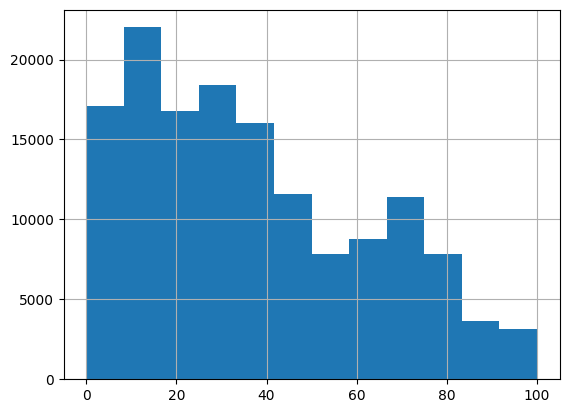

In [39]:
# 用最高频率值来填补缺失值
data = data_copy
for i in data.columns:
    data[i].fillna(data[i].mode())
data["Data_Value"].hist(bins=12)

<Axes: >

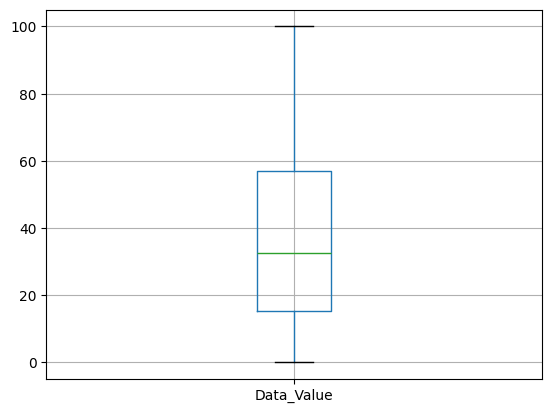

In [40]:
data[["Data_Value"]].boxplot()

C:\Users\WhiteLoli\AppData\Local\Temp\ipykernel_6640\654072820.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate("nearest")


<Axes: >

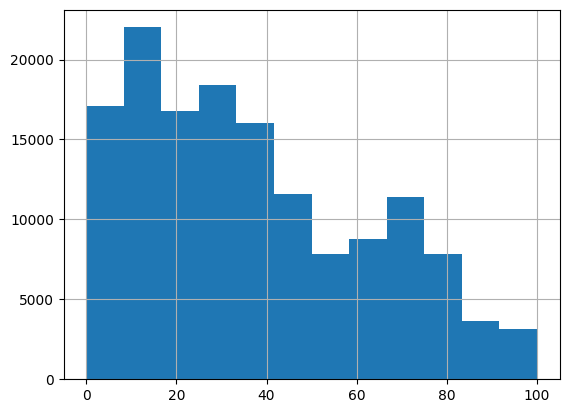

In [41]:
# 通过属性的相关关系来填补缺失值
data = data_copy
data.interpolate("nearest")
data["Data_Value"].hist(bins=12)

<Axes: >

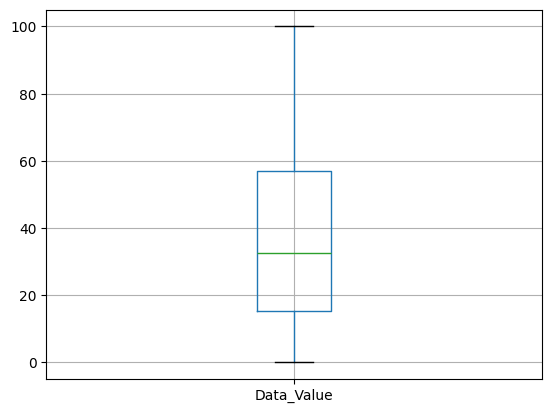

In [42]:
data[["Data_Value"]].boxplot()

C:\Users\WhiteLoli\AppData\Local\Temp\ipykernel_6640\3982632327.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate("nearest")


<Axes: >

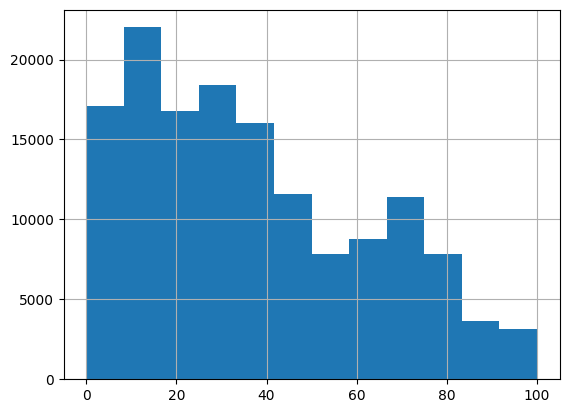

In [43]:
# 通过数据对象之间的相似性来填补缺失值
data = data_copy
x_train = data[~data["Data_Value"].isnull()][["LocationID"]]
y_train = data[~data["Data_Value"].isnull()]["Data_Value"]
test = data[data["Data_Value"].isnull()][["LocationID"]]

index, pred = knn_filled_func(x_train, y_train, test, k = 3, dispersed = True)

data.loc[index, "Data_Value"] = pred
data["Data_Value"].hist(bins=12)

<Axes: >

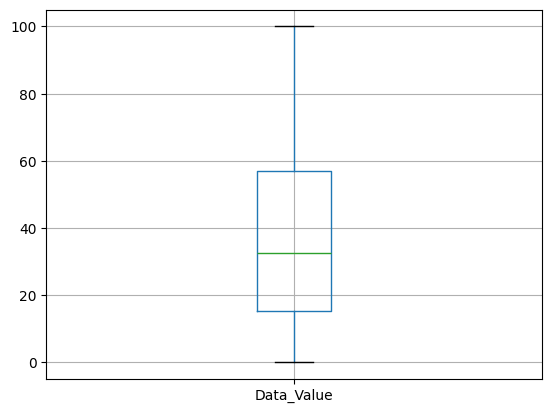

In [44]:
data[["Data_Value"]].boxplot()